In [1]:
import soundfile as sf

In [2]:
import librosa as lb

In [5]:
import matplotlib.pyplot as plt

In [13]:
import librosa.display

In [16]:
import numpy as np

In [3]:
audio, samplerate = sf.read('/home/rajesh/Downloads/Regional-Chennai-Tamil-0645-202272472953.wav')
audio, samplerate

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.15527344e-05, 9.15527344e-05, 1.22070312e-04]),
 22050)

In [6]:
chroma = lb.feature.chroma_stft(y=audio, sr=samplerate)
chroma

array([[0.        , 0.        , 0.2492848 , ..., 0.00466613, 0.01171901,
        0.0403339 ],
       [0.        , 0.        , 0.23259096, ..., 0.00881344, 0.02443398,
        0.0932716 ],
       [0.        , 0.        , 0.88518857, ..., 0.15907263, 0.23326863,
        0.43970169],
       ...,
       [0.        , 0.        , 0.18785505, ..., 0.0053522 , 0.00858448,
        0.03251908],
       [0.        , 0.        , 0.20686105, ..., 0.00453527, 0.00719903,
        0.02856676],
       [0.        , 0.        , 0.26728672, ..., 0.00382372, 0.00719093,
        0.02943382]])

In [23]:
S = np.abs(lb.stft(audio))
S

array([[0.00000000e+00, 0.00000000e+00, 1.47409386e-04, ...,
        1.62106489e-01, 4.95973511e-01, 9.10073004e-02],
       [0.00000000e+00, 0.00000000e+00, 1.41759502e-04, ...,
        1.12065255e+00, 5.05460052e-01, 5.56660248e-02],
       [0.00000000e+00, 0.00000000e+00, 1.26339151e-04, ...,
        4.62410881e-01, 8.35888556e-01, 2.27271309e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.25550250e-05, ...,
        1.45981125e-04, 2.19040166e-04, 2.61653662e-04],
       [0.00000000e+00, 0.00000000e+00, 5.73534308e-06, ...,
        1.70829545e-04, 1.63905824e-04, 2.58656317e-04],
       [0.00000000e+00, 0.00000000e+00, 5.93007125e-07, ...,
        1.83235455e-04, 2.00946093e-04, 2.51206814e-04]])

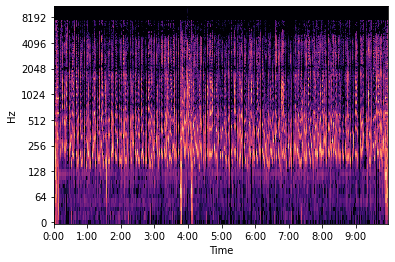

In [39]:
fig, ax = plt.subplots()
img = lb.display.specshow(lb.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time')
plt.savefig('/home/rajesh/Desktop/stft.png', dpi=300)

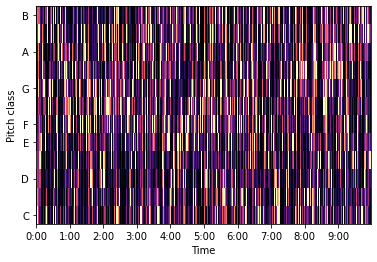

In [37]:
fig, ax = plt.subplots()
img = lb.display.specshow(chroma, y_axis='chroma', x_axis='time')
#fig.colorbar(img)
plt.savefig('/home/rajesh/Desktop/chroma.png')

In [2]:
from pydub import AudioSegment

In [12]:
seconds = [(500.0, 1500.0),
 (10500.0, 224500.0),
 (230500.0, 244000.0),
 (250000.0, 254000.0)]

In [13]:
sample_audio = AudioSegment.from_file("/home/rajesh/Desktop/Projects/Music-Speech-Separation/trimmed.wav", format="wav")

trimmed_audio = []
for sec in seconds:
    trimmed_audio.append(sample_audio[int(sec[0]):int(sec[1])])


extracted = trimmed_audio[0]
for i in range(1, len(trimmed_audio)):
    extracted = extracted+trimmed_audio[i]

extracted.export("/home/rajesh/Desktop/speechextracted.wav", format="wav")

<_io.BufferedRandom name='/home/rajesh/Desktop/speechextracted.wav'>

In [9]:
i = 1
for a in trimmed_audio:
    a.export("/home/rajesh/Desktop/"+str(i)+".wav", format="wav")
    i += 1